## Car Resale Price Prediction 

### Data Exploration

In [42]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df  = pd.read_csv("CarPred.csv")

In [45]:
df.shape

(20000, 18)

Number of rows: 20000

Number of columns : 18


In [46]:
df.head(10)

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299
5,toyota,0,0,1,0,0,0,0,1,0,1,1,2005,179774,2964,430,fortuner,288402.536044
6,toyota,0,0,0,1,0,0,0,0,1,0,1,2003,41214,3129,458,fortuner,330944.720201
7,suzuki,1,0,0,0,0,0,0,0,1,1,0,2012,169185,4071,83,alto,74671.940138
8,honda,0,0,1,0,0,0,1,0,0,1,0,2010,71897,4139,297,amaze,232880.423178
9,hyundai,1,0,0,0,0,0,0,0,1,1,0,2020,43706,1859,311,creta,331558.877131


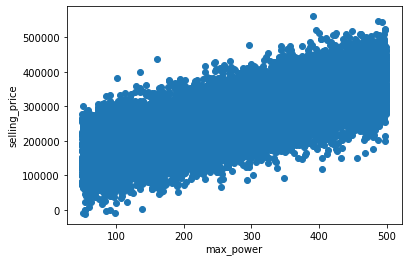

In [47]:
###Define x and y

x= df["max_power"]
y= df["selling_price"]

plt.scatter(x,y)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

### Assumptions of Linear Regression

1. Linearity : The relationship between the dependent and independent variable should be linear.


#### Simulation of Linearity

In [48]:
# Fit linear regression model
X = df[['year', 'km_driven', 'engine', 'max_power', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_patrol', 'fuel_lpg', 'fuel_electric', 'seller_dealer', 'seller_self']]
y = df['selling_price']

In [49]:
import statsmodels.api as sm
# add a constant term for intercept
x_with_const  = sm.add_constant(X)

In [50]:
#Fit linear model
model = sm.OLS(y, x_with_const).fit()

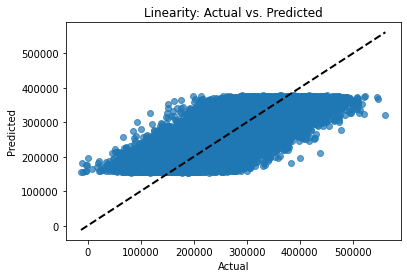

In [51]:
# Check linearity assumption by plotting actual vs. predicted values
plt.scatter(y, model.predict(), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linearity: Actual vs. Predicted')
plt.show()

By visually inspecting the scatter plot of actual versus predicted values,we see our linear regression model follows the linearity assumption

2. Homoscedasticity : The variance of the errors is constant across all levels of the independent variables.  In practical terms, this means that the spread of the residuals should remain approximately the same as the predicted values increase

#### Simulation of Homoscedasticity



In [52]:
residuals = model.resid

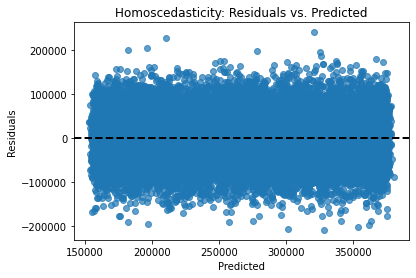

In [53]:
plt.scatter(model.predict(), residuals, alpha=0.7)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Predicted')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.show()

Based on the plot generated by above simulation, we see that scatter plot shows a consistent spread of residuals around the zero line with no clear pattern or trend, it suggests that the data satisfies the homoscedasticity assumption. 


3. Normality of Errors : The errors (residuals) of the model are normally distributed. 

#### Simulation for Normality of Errors

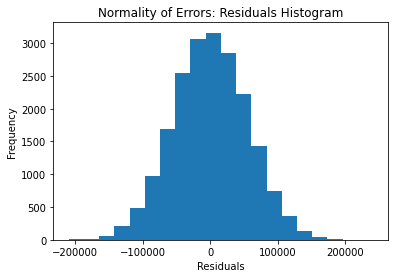

In [54]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title('Normality of Errors: Residuals Histogram')
plt.show()



Based on the histogram generated by the simulation, we see histogram exhibits a roughly bell-shaped curve with a single peak and comparable frequencies in each bin, it suggests that the residuals are approximately normally distributed.


4. No Autocorrelation : This assumption states that the residuals are not correlated with each other. Autocorrelation occurs when the residuals from one observation are correlated with the residuals from nearby observations. 

### Simulation for No Autocorrelation


The Durbin-Watson statistic is a test used to detect the presence of autocorrelation in the residuals of a regression model.

In [55]:
# Check independence of errors using Durbin-Watson test (DW statistic)
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson)

Durbin-Watson statistic: 2.01352969275313


The test statistic ranges from 0 to 4, with values close to 2 indicating no significant autocorrelation.

Based on the Durbin-Watson statistic generated by the simulation, you can evaluate whether your dataset follows the assumption of no autocorrelation.

If the Durbin-Watson statistic is close to 2 (typically between 1.5 and 2.5), it suggests that there is no significant autocorrelation in the residuals, indicating that the assumption of independence of errors is met.

However, if the statistic deviates substantially from 2, it may indicate the presence of autocorrelation, requiring further investigation and possibly model adjustments.

5. No Perfect Multicollinearity : In multiple linear regression (where there are more than one independent variable), there should be no perfect linear relationship between the independent variables. Perfect multicollinearity occurs when one independent variable can be exactly predicted from another independent variable or a combination of other independent variables. This situation makes it impossible to estimate the unique effect of each independent variable on the dependent variable.

#### Simulation for No Perfect Multicollinearity

The Variance Inflation Factor (VIF) is a statistical tool used in regression analysis to detect and measure the severity of multicollinearity

The VIF calculates how much the variance of a regression coefficient is inflated due to multicollinearity. It is calculated for each independent variable in the model. 

Here are some general guidelines for interpreting VIF values:
* VIF < 5: No multicollinearity issue.
* 5 ≤ VIF < 10: Moderate multicollinearity, may not be a major problem.
* VIF ≥ 10: Severe multicollinearity, investigate further and consider remedial actions.

In [56]:
# Check for multicollinearity using variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = x_with_const.copy()
vif_data = vif_data.drop(columns='const')  # Exclude the constant term
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)

             Variable        VIF
0                year  56.648571
1           km_driven   4.007914
2              engine   7.729838
3           max_power   5.478773
4   transmission_type   1.998263
5           seats_cop   2.010321
6        seats_family   3.019145
7         seats_large   5.036540
8            fuel_cng   1.994996
9         fuel_diesel   3.047902
10      fuel_electric        inf
11        fuel_patrol  17.090605
12           fuel_lpg   9.085081
13      fuel_electric        inf
14      seller_dealer   1.995045
15        seller_self   1.977211


/home/apoorva/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


**Linear Regression Model Development Steps:**
<ul>
  <li>Develop a univariate linear regression model to predict the selling price based on the input variable, max power.</li>
  <li>Define three functions: linear hypothesis, gradient computation, and error computation.</li>
  <li>Implement gradient descent to optimize the model parameters (Theta 0 and Theta 1).</li>
  <li>Stopped gradient descent after a fixed number of iterations (e.g., 50).</li>
  <li>Explain the importance of early stopping conditions for efficiency.</li>
</ul>

In [57]:
X = df["max_power"]
Y = df["selling_price"]


#Normalisation -> Standard Normalisation

u = X.mean()
std = X.std()

X = (X-u)/std

#### Linear Regression Hypothesis Function

In [58]:
def hypothesis(x, theta):
    # Linear hypothesis function: h(x) = theta[0] + theta[1]*x
    y_hat = theta[0]+theta[1]*x
    return y_hat

#### Gradient Computation for Linear Regression

In [59]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))  # Initializing gradient vector with zeros for Theta 0 and Theta 1

    for i in range(m):
        x = X[i]  # Current input
        y_hat = hypothesis(x, theta)  # Computing hypothesis for the current input
        y = Y[i]  # Actual output

        # Updating gradients for Theta 0 and Theta 1
        grad[0] += (y_hat - y)  # Partial derivative of cost with respect to Theta 0
        grad[1] += (y_hat - y)*x  # Partial derivative of cost with respect to Theta 1

    return grad/m  # Average gradient over all examples

#### Error Calculation for Linear Regression

In [60]:
def error(X, Y, theta):
    m = X.shape[0]  # Number of examples in the dataset
    total_error = 0.0  # Initialize the total error

    for i in range(m):
        x = X[i]  # Current input
        y_hat = hypothesis(x, theta)  # Compute hypothesis for the current input
        y = Y[i]  # Actual output

        # Compute the squared error for the current example
        error_i = (y_hat - y)**2
        total_error += error_i  # Accumulate the squared error

    return (total_error/m)  # Return the mean squared error

#### Gradient Descent Optimization for Linear Regression

In [61]:
def gradient_descent(X, Y, max_steps=100, learning_rate=0.1):
    theta = np.zeros((2,))  # Initialize weights Theta 0 and Theta 1 to zero
    error_list = []  # List to store errors during iterations
    theta_list = []  # List to store Theta values during updates

    for i in range(max_steps):
        # Compute gradient using the gradient function
        grad = gradient(X, Y, theta)

        # Compute error using the error function
        e = error(X, Y, theta)

        # Update weights Theta 0 and Theta 1 using the learning rate and gradients
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

        # Store the updated Theta values during each iteration
        theta_list.append((theta[0], theta[1]))
        # Store the error during each iteration
        error_list.append(e)

    return theta, error_list, theta_list

In [62]:
theta, error_list, theta_list = gradient_descent(X, Y, max_steps=50)
print(theta)

[264899.50073976  63179.87873954]


theta0 = 264899.50073976

theta1 = 63179.87873954

Y = theta0 + theta1.X

Here, X is normalised

#### Animate Visualization of Linear Regression Training

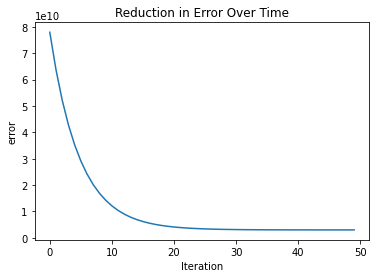

In [63]:
fig = plt.figure()

plt.plot(error_list)
plt.xlabel("Iteration")
plt.ylabel("error")
plt.title('Reduction in Error Over Time')
plt.show()

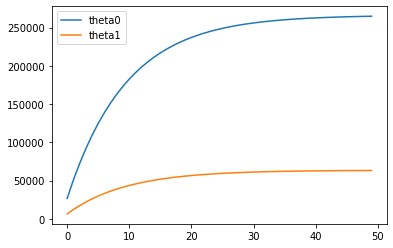

In [66]:
theta_list = np.array(theta_list)

plt.plot(theta_list[:,0], label = 'theta0')
plt.plot(theta_list[:,1], label ='theta1')
plt.legend()
plt.show()

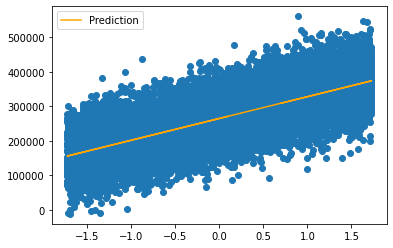

In [67]:
fig = plt.figure()
Y_hat = hypothesis(X, theta)
plt.scatter(X,Y)
plt.plot(X, Y_hat, color='orange', label='Prediction')
plt.legend()
plt.show()

#### R-squared Score Calculation

In [73]:
def r2_score(Y, Y_hat):
    ssr = np.sum((Y-Y_hat)**2)
    tss = np.sum((Y-np.mean(Y))**2)
    score = 1 -(ssr/tss)
    return score

In [74]:
r2_score(Y,Y_hat)

0.5723904152416218

### Linear Regression using Scikit Learn

In [76]:
from sklearn.linear_model import LinearRegression

In [83]:
X = X.to_numpy().reshape(-1,1)
Y = Y.to_numpy().reshape(-1,1)

In [88]:
X.shape
Y.shape

(20000, 1)

In [90]:
model = LinearRegression()

In [91]:
model.fit(X,Y)

LinearRegression()

In [92]:
model.coef_

array([[63507.27187246]])

In [93]:
model.intercept_

array([266271.80577075])

In [94]:
model.score(X,Y)

0.5726730479014122

In [98]:
output = model.predict(X)


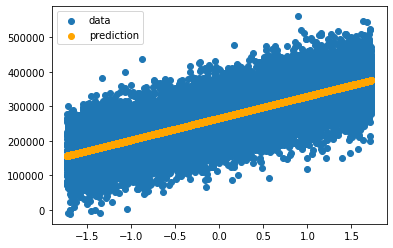

In [100]:

fig = plt.figure()
plt.scatter(X, Y, label='data')
plt.scatter(X, output, color='orange', label='prediction')
plt.legend()
plt.show()